# 1.NSCLC Sex-stratified SC Analysis

## Data selection, pseudobulk, create input for DESEQ2

alternating between enviroment scanpy for visualization and nsclc_gender_atlas for sccoda because in this last env sccoda.viz and sccoda.dat do not work anymore 

In [3]:
import scanpy as sc

In [4]:
import warnings
import numpy as np
import pandas as pd 
import scanpy as sc
#import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import altair as alt
#import pertpy as pt
#from pandas.api.types import is_categorical_dtype
#from pandas import CategoricalDtype

In [5]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

#from sccoda.util import comp_ana as mod
#from sccoda.util import cell_composition_data as dat
#from sccoda.util import data_visualization as viz

#import sccoda.datasets as scd

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from statannotations.Annotator import Annotator

In [8]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/pseudobulk/"
input_path    = f"{path}/paired_adata_clean.h5ad"

In [9]:
adata = sc.read_h5ad(input_path) 

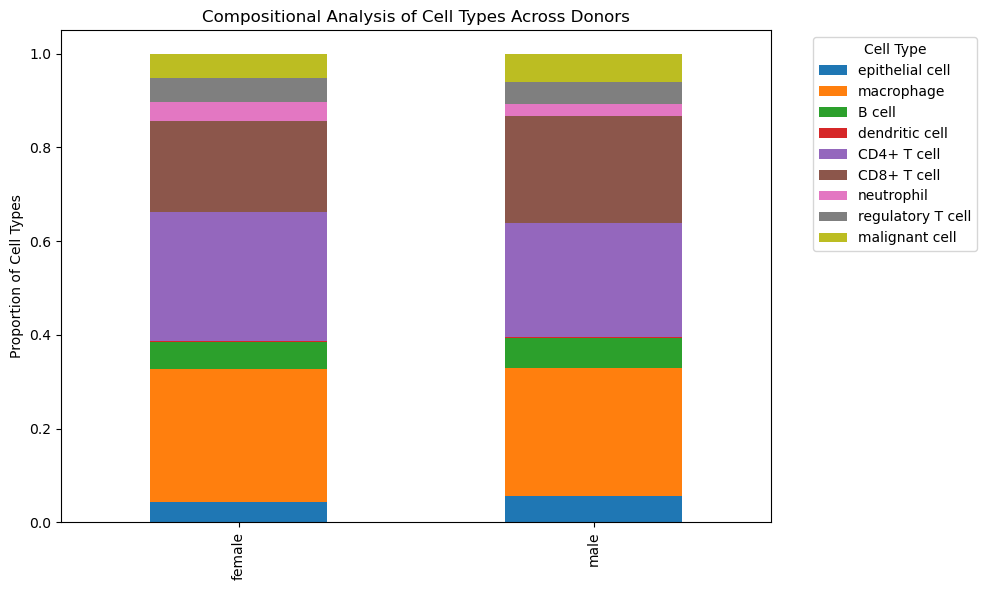

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Aggregate the counts of cell types across donors or conditions
# Assuming 'cell_type' and 'donor_id' (or 'condition') are columns in adata.obs
cell_type_counts = adata.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)

# Step 2: Normalize to get proportions if desired
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

# Step 3: Plot the compositional analysis as a stacked bar chart
cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types Across Donors')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


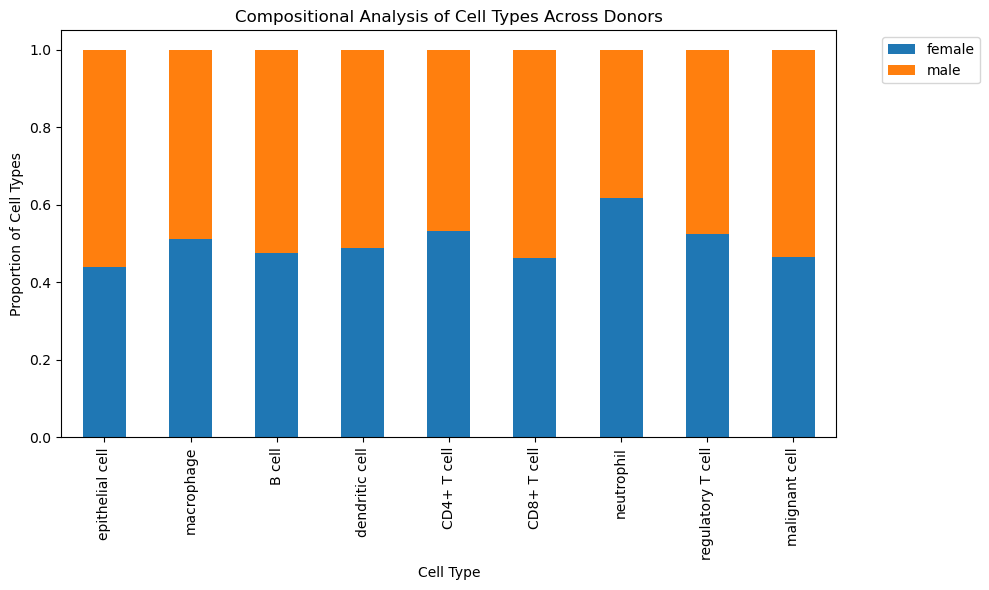

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Aggregate the counts of cell types across donors or conditions
# Assuming 'cell_type' and 'donor_id' (or 'condition') are columns in adata.obs
cell_type_counts = adata.obs.groupby(['cell_type', 'sex']).size().unstack(fill_value=0)

# Step 2: Normalize to get proportions if desired
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

# Step 3: Plot the compositional analysis as a stacked bar chart
cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Cell Type')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types Across Donors')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [33]:
cell_type_proportions

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell,malignant cell
sex,,,,,,,,,
female,0.043045,0.284989,0.056546,0.002416,0.274552,0.194593,0.040185,0.052440,0.051236
male,0.055474,0.274537,0.063169,0.002552,0.242873,0.228849,0.025133,0.047964,0.059449


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


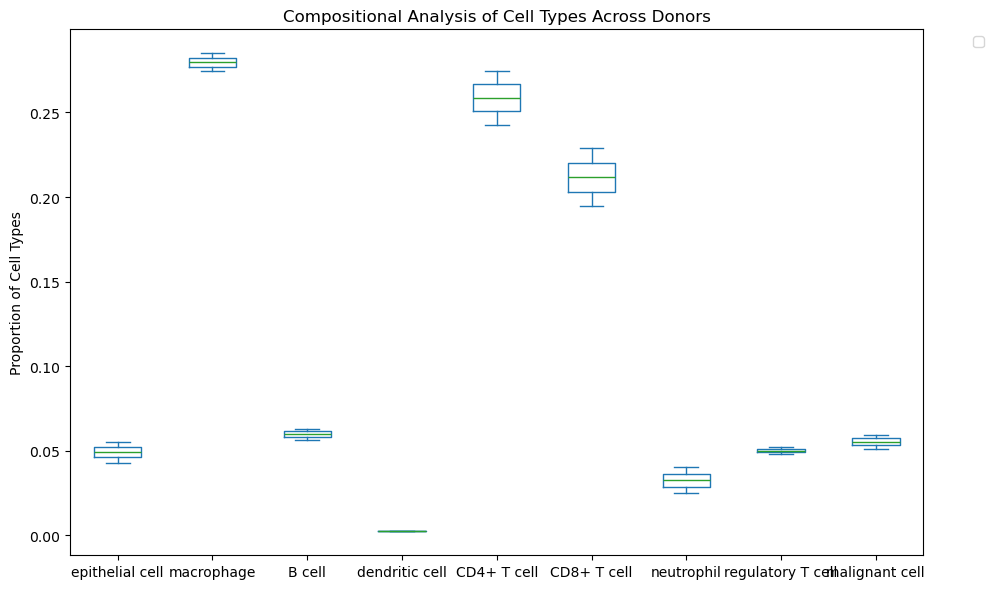

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Aggregate the counts of cell types across donors or conditions
# Assuming 'cell_type' and 'donor_id' (or 'condition') are columns in adata.obs
cell_type_counts = adata.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)

# Step 2: Normalize to get proportions if desired
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

# Step 3: Plot the compositional analysis as a stacked bar chart
cell_type_proportions.plot(kind='box',figsize=(10, 6))

# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types Across Donors')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


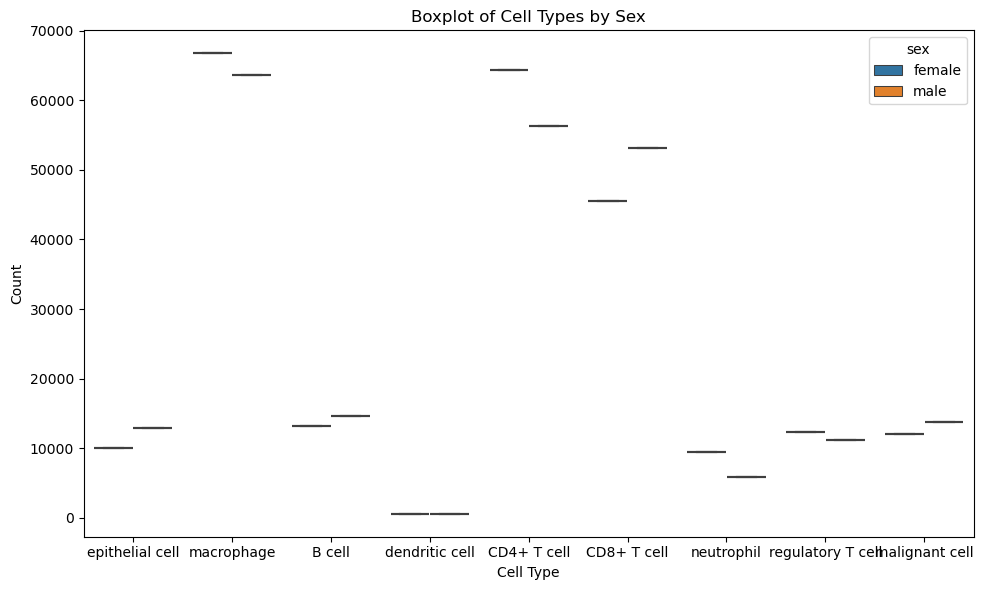

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample data
# Assuming 'sex' and 'cell_type' are columns in your dataset
# and we have a DataFrame similar to adata.obs
# If not, adapt the loading accordingly
data = adata.obs[['sex', 'cell_type']]

# Step 1: Create a DataFrame where each row corresponds to a combination of 'sex' and 'cell_type'
# We'll skip the proportion calculation as we are focusing on boxplots
cell_type_counts = data.groupby(['sex', 'cell_type']).size().reset_index(name='count')

# Step 2: Create the boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='count', hue='sex', data=cell_type_counts)

# Step 3: Customize plot
plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.title('Boxplot of Cell Types by Sex')

# Adjust the layout to make sure the legend and everything fits
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
adata.var

,is_highly_variable,mito,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,feature_is_filtered,feature_name,feature_reference,feature_biotype
A1BG,True,False,86866,2.527138,90.681054,2355657.0,False,A1BG,NCBITaxon:9606,gene
A1BG-AS1,True,False,12257,0.369194,98.685074,344142.0,False,A1BG-AS1,NCBITaxon:9606,gene
A2M,True,False,122241,22.579874,86.886039,21047694.0,False,A2M,NCBITaxon:9606,gene
A2M-AS1,False,False,8827,0.172223,99.053043,160537.0,False,A2M-AS1,NCBITaxon:9606,gene
A2ML1,True,False,5096,0.038011,99.453303,35432.0,False,A2ML1,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...,...,...
ZXDC,False,False,43291,0.442399,95.355760,412380.0,False,ZXDC,NCBITaxon:9606,gene
ZYG11A,False,False,3517,0.009742,99.622698,9081.0,False,ZYG11A,NCBITaxon:9606,gene
ZYG11B,False,False,71512,0.275276,92.328224,256597.0,False,ZYG11B,NCBITaxon:9606,gene
ZYX,False,False,205370,4.536451,77.967996,4228626.0,False,ZYX,NCBITaxon:9606,gene


In [ ]:
adata_ss = adata[adata.obs["origin"].isin(["tumor_primary","normal_adjacent"])]

In [ ]:
adata = adata_ss

In [ ]:
set(adata.obs.origin)

In [ ]:
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Assume `adata` is your AnnData object
gene_name = "ENSG00000121410"
condition_key = "origin"  # Replace with the actual key for condition in `adata.obs`

# Extract expression values for the gene "ADX"
# Convert the sparse matrix to a dense format first, then flatten
adx_expression = adata[:, gene_name].X.toarray().flatten()

# Extract the condition labels (tumor vs normal)
conditions = adata.obs[condition_key]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'ADX_expression': adx_expression,
    'Condition': conditions
})

# Perform the t-test between tumor and normal conditions
tumor_expr = df[df['Condition'] == 'tumor_primary']['ADX_expression']
normal_expr = df[df['Condition'] == 'normal_adjacent']['ADX_expression']

t_stat, p_value = ttest_ind(tumor_expr, normal_expr)

# Plot the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Condition', y='ADX_expression', data=df)

# Annotate the plot with the p-value
plt.text(0.5, max(df['ADX_expression']), f'p-value = {p_value:.4f}', 
         ha='center', va='bottom', fontsize=12, color='black')

plt.title(f'Violin plot of {gene_name} expression in Tumor vs Normal')
plt.show()



In [ ]:
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Assume `adata` is your AnnData object
gene_name = "ENSG00000121410"
condition_key = "origin"  # Replace with the actual key for condition in `adata.obs`

# Extract expression values for the gene "ADX"
# Convert the sparse matrix to a dense format first, then flatten
adx_expression = adata[:, gene_name].X.toarray().flatten()

# Extract the condition labels (tumor vs normal)
conditions = adata.obs[condition_key]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'ADX_expression': adx_expression,
    'Condition': conditions
})

# Perform the t-test between tumor and normal conditions
tumor_expr = df[df['Condition'] == 'tumor_primary']['ADX_expression']
normal_expr = df[df['Condition'] == 'normal_adjacent']['ADX_expression']

t_stat, p_value = ttest_ind(tumor_expr, normal_expr)

# Determine the significance level
if p_value <= 0.001:
    significance = '***'
elif p_value <= 0.01:
    significance = '**'
elif p_value <= 0.05:
    significance = '*'
else:
    significance = 'ns'  # Not significant

# Plot the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Condition', y='ADX_expression', data=df)

# Annotate the plot with the significance level
plt.text(0.5, max(df['ADX_expression']), significance, 
         ha='center', va='bottom', fontsize=16, color='black')

#plt.title(f'Violin plot of {gene_name} expression in Tumor vs Normal')
plt.show()


In [ ]:
nsclc_chrom = pd.read_csv(f"{path}/out/007_re_analysis/tables/input/adata_var_nsclc_chrom.csv")

In [ ]:
adata

In [ ]:
adata.obs.disease.value_counts()

In [ ]:
adata.obs.tumor_stage.value_counts()

In [ ]:
adata.obs.sex.value_counts()

In [ ]:
adata.obs.origin.value_counts()

### 01.SELECT ONLY male, female & tumor, normal_adjacent

In [ ]:
adata = adata[(adata.obs["disease"] != "normal") & (adata.obs["disease"] != "chronic obstructive pulmonary disease")] #exclude normal and COPD samples
adata = adata[adata.obs["tumor_stage"].notna()] #exclude samples without tumor stage
adata = adata[(adata.obs["sex"]=="male")| (adata.obs["sex"]=="female")]

In [ ]:
adata = adata[(adata.obs["origin"]=="tumor_primary")| (adata.obs["origin"]=="normal_adjacent")]

In [ ]:
adata.obs.disease.value_counts()

In [ ]:
adata.obs.tumor_stage.value_counts()

In [ ]:
adata.obs.sex.value_counts()

In [ ]:
adata.obs.origin.value_counts()

### 02.CELL TPYE RE-CLASIFICATION 

In [ ]:
adata.obs.cell_type.value_counts()

In [ ]:
adata.obs.cell_type_major.value_counts()

In [ ]:
cells_of_interest=['alveolar macrophage', 'neutrophil',
 'macrophage','malignant cell',
 'B cell',
  'regulatory T cell',
'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'neutrophils','epithelial cell of lung','multi-ciliated epithelial cell' ]
subset_adata = adata[adata.obs["cell_type"].isin(cells_of_interest)] 


In [ ]:
set(subset_adata.obs.cell_type)

In [ ]:
set(subset_adata.obs.cell_type_major)

In [ ]:
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['epithelial cell of lung','multi-ciliated epithelial cell',], 'epithelial cell')
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['alveolar macrophage'], 'macrophage')
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['CD4-positive, alpha-beta T cell'], 'CD4+ T cell')
subset_adata.obs["cell_type"]= subset_adata.obs["cell_type"].replace(['CD8-positive, alpha-beta T cell'], 'CD8+ T cell')

In [ ]:
set(subset_adata.obs.cell_type)

In [ ]:
subset_adata

In [ ]:
subset_adata.obs.disease.value_counts()

In [ ]:
adata

## PAIRED SAMPLES REMOVE NSCLC 

In [ ]:
subset_adata = subset_adata[(subset_adata.obs["disease"]!="non-small cell lung carcinoma")]

In [ ]:
subset_adata = subset_adata[(subset_adata.obs["disease"]!="squamous cell lung carcinoma")]

In [ ]:
df_grouped = subset_adata.obs.groupby(["origin","donor_id"]).count()

In [ ]:
df_grouped.reset_index(inplace= True)

In [ ]:
df_grouped_normal = df_grouped[df_grouped["origin"]=="normal_adjacent"]

In [ ]:
df_grouped_normal = df_grouped_normal[df_grouped_normal['sample'] != 0]

In [ ]:
df_grouped_tumor = df_grouped[df_grouped["origin"]=="tumor_primary"]

In [ ]:
df_grouped_tumor = df_grouped_tumor[df_grouped_tumor['sample'] != 0]

In [ ]:
list(set(df_grouped_tumor.donor_id))

In [ ]:
common_ids =list(set(df_grouped_normal.donor_id)& set(df_grouped_tumor.donor_id))

In [ ]:
len(common_ids)

In [ ]:
paired_adata = subset_adata[subset_adata.obs['donor_id'].isin(common_ids)].copy()

In [ ]:
df = paired_adata.obs#
origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()
origin_counts.columns = ['origin', 'count']

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')
plt.xlabel('Origin')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per Origin')
plt.show()

In [ ]:
df = paired_adata.obs#
origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()
origin_counts.columns = ['disease', 'count']

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')
plt.xlabel('disease')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per disease')
plt.show()

In [ ]:
#paired_adata.write_h5ad("paired_adata.h5ad")

In [ ]:
paired_adata = sc.read_h5ad("paired_adata.h5ad")

In [ ]:
paired_adata_normal = paired_adata[paired_adata.obs["origin"]=="normal_adjacent"]
paired_adata_tumor = paired_adata[paired_adata.obs["origin"]=="tumor_primary"]

In [ ]:
df_num = paired_adata.obs[["cell_type","sex"]].value_counts()

In [ ]:
df_num_normal = paired_adata_normal.obs[["cell_type","sex"]].value_counts()

In [ ]:
df_num_tumor = paired_adata_tumor.obs[["cell_type","sex"]].value_counts()

In [ ]:
df_num

In [ ]:
df_num_normal

In [ ]:
df_num_tumor

In [ ]:
df_num.to_csv("cell_count.csv")

In [ ]:
df_num_tumor.to_csv("cell_count_tumor.csv")

In [ ]:
df_num_normal.to_csv("cell_count_normal.csv")

In [ ]:
#data_all.write_h5ad("data_all.h5ad")

In [ ]:
tmp = pd.crosstab(paired_adata.obs['cell_type'], paired_adata.obs['sex'], normalize='columns').T

# Plotting the stacked barplot
ax = tmp.plot(kind='bar', stacked=True)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')

# Adjusting legend
ax.legend(title='cell_type', bbox_to_anchor=(1.35, 1), loc='upper right')
# Adding y-axis label
ax.set_ylabel('Cell Proportion')


#plt.tight_layout()

# Save the plot
plt.savefig('stacked_barplot_with_percentages.png', bbox_inches='tight')
# Show the plot
plt.show()

In [ ]:
tmp = pd.crosstab(paired_adata_normal.obs['cell_type'], paired_adata_normal.obs['sex'], normalize='columns').T

# Plotting the stacked barplot
ax = tmp.plot(kind='bar', stacked=True)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')

# Adjusting legend
ax.legend(title='cell_type', bbox_to_anchor=(1.36, 1), loc='upper right')
# Adding y-axis label
ax.set_ylabel('Cell Proportion')


#plt.tight_layout()

# Save the plot
#plt.savefig('stacked_barplot_with_percentages_normal.png', bbox_inches='tight')
# Show the plot
plt.show()

In [ ]:
tmp = pd.crosstab(paired_adata_tumor.obs['cell_type'], paired_adata_tumor.obs['sex'], normalize='columns').T

# Plotting the stacked barplot
ax = tmp.plot(kind='bar', stacked=True)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')

# Adjusting legend
ax.legend(title='cell_type', bbox_to_anchor=(1.5, 1), loc='upper right')
# Adding y-axis label
ax.set_ylabel('Cell Proportion')


plt.tight_layout()

# Save the plot
plt.savefig('stacked_barplot_with_percentages_tumor.png', bbox_inches='tight')
# Show the plot
plt.show()

In [ ]:
val_counts = paired_adata.obs['cell_type'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (1,4))
ov.pl.cellproportion(adata=adata,celltype_clusters='clusters',
                    groupby='age(days)',legend=True,ax=ax)

## SUMMARY 
- Filtered for male, female & tumor, normal_adjacent
- Filtered and reclassified cells of interest: 'B cell','CD4+ T cell', 'CD8+ T cell', 'epithelial cell', 'macrophage', 'malignant cell', 'neutrophil', 'regulatory Tcell'
- Filtered to exclude samples coming from NSCLC
- Filtered for PAIRED SAMPLES (82 donor_id that have normal_adjacent and tumor_primary  samples)
- KEEP LUADN AND LUSC

In [ ]:
frac_by_condition = (
    paired_adata_normal.obs.groupby(["dataset", "cell_type", "tumor_stage", "donor_id","origin"])
    .apply(lambda x: x.value_counts("sex", normalize=False))
    .reset_index(name="n_cells")
    .assign(condition=lambda x: x["cell_type"].astype(str))
)

In [ ]:
frac_by_condition

In [ ]:
frac_pivot = (
    frac_by_condition.pivot(
        index=["donor_id", "dataset", "sex", "tumor_stage","origin"],
        columns="cell_type",
        values="n_cells",
    )
    .reset_index()
    #.drop(columns="other")
)


In [ ]:
frac_pivot

In [ ]:
data_all = dat.from_pandas(
    frac_pivot, covariate_columns=["donor_id", "dataset", "sex", "tumor_stage","origin"]
)

In [ ]:
data_all.obs["sex"] = pd.Categorical(
    data_all.obs["sex"], categories=["male", "female"]
)

In [ ]:
data_all._sanitize()

In [ ]:
data_all

In [ ]:
#data_all.write_h5ad("data_all.h5ad")

In [ ]:
data_all = sc.read_h5ad("data_all.h5ad")

In [ ]:
data_all.obs

In [ ]:
data_all_tumor = data_all[data_all.obs["origin"]=="tumor_primary"]
data_all_normal = data_all[data_all.obs["origin"]=="normal_adjacent"]

In [ ]:
boxplots(data_all, feature_name="sex", figsize=(12, 5), cmap = "inferno")

plt.savefig( "cell_proportion_nosig.png")


In [ ]:
boxplots(data_all_normal, feature_name="sex", figsize=(12, 5), cmap = "inferno")

#plt.savefig( "cell_proportion_nosig.png")


In [ ]:
boxplots(data_all_normal, feature_name="sex", figsize=(12, 5), cmap = "inferno")

#plt.savefig( "cell_proportion_nosig_normal.png")


In [ ]:
boxplots(data_all_tumor, feature_name="sex", figsize=(12, 5), cmap = "inferno")

#
#plt.savefig( "cell_proportion_nosig_tumor.png")


In [ ]:
boxplots(data_all_normal, feature_name="sex", figsize=(12, 5), cmap = "inferno")

#
#plt.savefig( "cell_proportion_nosig_tumor.png")


In [ ]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [ ]:
import anndata as ad

In [ ]:
boxplots(
    data_all_tumor,
    feature_name="sex",
    plot_facets=False,
   # y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.savefig( "small_cell_prop_tumor.png")

In [ ]:
boxplots(
    data_all_normal,
    feature_name="sex",
    plot_facets=False,
   # y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.savefig( "small_cell_prop_normal.png")

In [ ]:
boxplots(
    data_all_normal,
    feature_name="sex",
    plot_facets=True,
   # y_scale="log",
    add_dots=True,
    cmap="Reds",
    save=True
)
plt.savefig("facet_cell_prop_normal.svg")

In [ ]:
boxplots(
    data_all_normal,
    feature_name="sex",
    plot_facets=True,
   y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.savefig("facet_cell_prop_tumor.png")

In [ ]:
plot_df_tumor = plot_df_tumor.dropna()

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests



cell_types = plot_df_tumor['Cell type'].unique()


t_test_results = {}

# Perform t-test for each cell type
for cell_type in cell_types:
 
    cell_data = plot_df_tumor[plot_df_tumor['Cell type'] == cell_type]
    

    male_data = cell_data[cell_data['sex'] == 'male']['Proportion']
    female_data = cell_data[cell_data['sex'] == 'female']['Proportion']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(male_data, female_data)
    

    t_test_results[cell_type] = {'t_stat': t_stat, 'p_value': p_value}


t_test_results_df = pd.DataFrame(t_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(t_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
t_test_results_df['adjusted_p_value'] = adjusted_p_values

print(t_test_results_df)


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Unique cell types
cell_types = plot_df_tumor['Cell type'].unique()

# Dictionary to hold Wilcoxon test results
wilcoxon_test_results = {}

# Perform Wilcoxon test for each cell type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_tumor[plot_df_tumor['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['Proportion']
    female_data = cell_data[cell_data['sex'] == 'female']['Proportion']
    
    # Perform Wilcoxon rank-sum test
    stat, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
    
    # Store the results
    wilcoxon_test_results[cell_type] = {'stat': stat, 'p_value': p_value}

# Convert results to DataFrame for better display
wilcoxon_test_results_df = pd.DataFrame(wilcoxon_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(wilcoxon_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
wilcoxon_test_results_df['adjusted_p_value'] = adjusted_p_values

print(wilcoxon_test_results_df)


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Unique cell types
cell_types = plot_df_normal['Cell type'].unique()

# Dictionary to hold Wilcoxon test results
wilcoxon_test_results = {}

# Perform Wilcoxon test for each cell type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_normal[plot_df_normal['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['Proportion']
    female_data = cell_data[cell_data['sex'] == 'female']['Proportion']
    
    # Perform Wilcoxon rank-sum test
    stat, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
    
    # Store the results
    wilcoxon_test_results[cell_type] = {'stat': stat, 'p_value': p_value}

# Convert results to DataFrame for better display
wilcoxon_test_results_df = pd.DataFrame(wilcoxon_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(wilcoxon_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
wilcoxon_test_results_df['adjusted_p_value'] = adjusted_p_values

print(wilcoxon_test_results_df)


In [ ]:
viz.boxplots(
    data_all,
    feature_name="sex",
    plot_facets=False,
   # y_scale="log",
    add_dots=True,
    cmap="Reds",
)

In [ ]:
ax = viz.boxplots(
    data_all,
    feature_name="sex",
    plot_facets=True,
   y_scale="log",
    #args_swarmplot= {hue:"dataset"},
    add_dots=True,
    cmap="Reds",
)



In [ ]:
data_all.obs

In [ ]:
import numpy as np

In [ ]:
data = data_all
feature_name="sex"
y_scale = "relative"
plot_facets= True
add_dots= True
cell_types = None
args_boxplot= {}
args_swarmplot= {}
figsize= None
dpi= 100
cmap= "Blues"
plot_legend = True
level_order = None

In [ ]:
#plot_df.to_csv("plot_df.csv")

In [ ]:
plot_df  = pd.read_csv("plot_df.csv", index_col=0)

In [ ]:
annot.configure()

In [ ]:
count_df

In [ ]:
df_filtered = count_df.loc[~(count_df == 0).all(axis=1)]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Assuming 'data_all' is already defined
data = adata
feature_name = "sex"
y_scale = "relative"
plot_facets = True
add_dots = True
cell_types = None
args_boxplot = {}
args_swarmplot = {}
figsize = None
dpi = 100
cmap = "Blues"
plot_legend = True
level_order = None

##relative
sample_sums = np.sum(data.X, axis=1, keepdims=True)
X = data.X / sample_sums
value_name = "Proportion"

#log
#X = np.log(data.X + 1)
#value_name = "log(count)"

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)
if cell_types is not None:
    plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

pairs = [("male", "female")]  # Define pairs for statistical comparisons

if plot_facets:

    if level_order is None:
        level_order = pd.unique(plot_df[feature_name])

    K = X.shape[1]

    g = sns.FacetGrid(
        plot_df,
        col="Cell type",
        sharey=False,
        col_wrap=int(np.floor(np.sqrt(K))),
        height=5,
        aspect=2,
    )
    
    g.map(
        sns.boxplot,
        feature_name,
        value_name,
        palette=cmap,
        order=level_order,
        **args_boxplot
    )
   
    for ax in g.axes.flat:
        cell_type = ax.get_title().split(' = ')[-1]
        sub_df = plot_df[plot_df["Cell type"] == cell_type]
        annot = Annotator(ax, pairs, data=sub_df, x=feature_name, y=value_name, order=level_order)
        annot.configure(test='t-test_paired', text_format='simple', loc='inside', verbose=2)
        annot.apply_and_annotate()

    if add_dots:

        if "hue" in args_swarmplot:
            hue = args_swarmplot.pop("hue")
        else:
            hue = None

        if hue is None:
            g.map(
                sns.swarmplot,
                feature_name,
                value_name,
                color="black",
                order=level_order,
                **args_swarmplot
            ).set_titles("{col_name}")
        else:
            g.map(
                sns.swarmplot,
                feature_name,
                value_name,
                hue,
                order=level_order,
                **args_swarmplot
            ).set_titles("{col_name}")

   # plt.tight_layout()

else:

    if level_order:
        args_boxplot["hue_order"] = level_order
        args_swarmplot["hue_order"] = level_order

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
                palette=cmap, ax=ax, **args_boxplot)

    annot = Annotator(ax, pairs, data=plot_df, x="Cell type", y=value_name, hue=feature_name, order=level_order)
    annot.configure(test='t-test_paired', text_format='simple', loc='inside', verbose=2 )
    annot.apply_and_annotate()

    if add_dots:
        sns.swarmplot(
            x="Cell type",
            y=value_name,
            data=plot_df,
            hue="dataset",
            ax=ax,
            dodge=True,
            color="black",
            **args_swarmplot
        )

    cell_types = pd.unique(plot_df["Cell type"])
    ax.set_xticklabels(cell_types, rotation=90)

    if plot_legend:
        handles, labels = ax.get_legend_handles_labels()
        handout = []
        labelout = []
        for h, l in zip(handles, labels):
            if l not in labelout:
                labelout.append(l)
                handout.append(h)
        ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)

    plt.tight_layout()

plt.show()
#g.savefig('cell_prop_normal.svg')  

In [ ]:
from statannotations.Annotator import Annotator
import seaborn as sns

data = data_all_tumor
feature_name = "sex"
y_scale = "relative"
plot_facets = True
add_dots = True
cell_types = None
args_boxplot = {}
args_swarmplot = {}
figsize = None
dpi = 100
cmap = "Blues"
plot_legend = True
level_order = None


sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

annot = Annotator(ax, pairs, data=plot_df, x="Cell type", y=value_name, hue=feature_name, order=level_order)
annot.configure(test='t-test_paired', text_format='simple', loc='inside', verbose=2 )
annot.apply_and_annotate()

In [ ]:
from matplotlib import cm, rcParams

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

from anndata import AnnData
from typing import Optional, Tuple, Collection, Union, List

sns.set_style("ticks")

### STACK BAR

In [ ]:
def stackbar(
        y: np.ndarray,
        type_names: List[str],
        title: str,
        level_names: List[str],
        figsize: Optional[Tuple[int, int]] = None,
        dpi: Optional[int] = 100,
        cmap: Optional[ListedColormap] = cm.tab20,
        plot_legend: Optional[bool] = True,
) -> plt.Subplot:
    """
    Plots a stacked barplot for one (discrete) covariate
    Typical use (only inside stacked_barplot): plot_one_stackbar(data.X, data.var.index, "xyz", data.obs.index)

    Parameters
    ----------
    y
        The count data, collapsed onto the level of interest. i.e. a binary covariate has two rows, one for each group, containing the count
        mean of each cell type
    type_names
        The names of all cell types
    title
        Plot title, usually the covariate's name
    level_names
        names of the covariate's levels
    figsize
        figure size
    dpi
        dpi setting
    cmap
        The color map for the barplot
    plot_legend
        If True, adds a legend

    Returns
    -------
    Returns a plot

    ax
        a plot

    """
    n_bars, n_types = y.shape

    figsize = rcParams["figure.figsize"] if figsize is None else figsize

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    r = np.array(range(n_bars))
    sample_sums = np.sum(y, axis=1)

    barwidth = 0.85
    cum_bars = np.zeros(n_bars)

    for n in range(n_types):
        bars = [i / j * 100 for i, j in zip([y[k][n] for k in range(n_bars)], sample_sums)]
        plt.bar(r, bars, bottom=cum_bars, color=cmap(n % cmap.N), width=barwidth, label=type_names[n], linewidth=0)
        cum_bars += bars

    ax.set_title(title)
    if plot_legend:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    ax.set_xticks(r)
    ax.set_xticklabels(level_names, rotation=45)
    ax.set_ylabel("Proportion")

    return ax


In [ ]:
data = data_all
feature_name = "sex"
figsize = None
plot_legend  = True,
level_order = None
dpi=100
cmap = cm.tab20

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from typing import Optional, Tuple, List
from anndata import AnnData

def boxplots(
        data: AnnData,
        feature_name: str,
        y_scale: str = "relative",
        plot_facets: bool = False,
        add_dots: bool = False,
        cell_types: Optional[list] = None,
        args_boxplot: Optional[dict] = {},
        args_swarmplot: Optional[dict] = {},
        figsize: Optional[Tuple[int, int]] = None,
        dpi: Optional[int] = 100,
        cmap: Optional[str] = "Blues",
        plot_legend: Optional[bool] = True,
        level_order: List[str] = None,
        save: bool = True,
        filename: str = "boxplot.png"
) -> Optional[Tuple[plt.Subplot, sns.axisgrid.FacetGrid]]:
    """\
    Grouped boxplot visualization. The cell counts for each cell type are shown as a group of boxplots,
    with intra--group separation by a covariate from data.obs.

    The cell type groups can either be ordered along the x-axis of a single plot (plot_facets=False) or as plot facets (plot_facets=True).

    Parameters
    ----------
    data
        A scCODA-compatible data object
    feature_name
        The name of the feature in data.obs to plot
    y_scale
        Transformation to of cell counts. Options: "relative" - Relative abundance, "log" - log(count), "count" - absolute abundance (cell counts)
    plot_facets
        If False, plot cell types on the x-axis. If True, plot as facets
    add_dots
        If True, overlay a scatterplot with one dot for each data point
    cell_types
        Subset of cell types that should be plotted
    args_boxplot
        Arguments passed to sns.boxplot
    args_swarmplot
            Arguments passed to sns.swarmplot
    figsize
        figure size
    dpi
        dpi setting
    cmap
        The seaborn color map for the barplot
    plot_legend
        If True, adds a legend
    level_order
        Custom ordering of bars on the x-axis

    Returns
    -------
    Depending on `plot_facets`, returns a :class:`~plt.AxesSubplot` (`plot_facets = False`) or :class:`~sns.axisgrid.FacetGrid` (`plot_facets = True`) object

    ax
        if `plot_facets = False`
    g
        if `plot_facets = True`
    """

    # y scale transformations
    if y_scale == "relative":
        sample_sums = np.sum(data.X, axis=1, keepdims=True)
        X = data.X/sample_sums
        value_name = "Proportion"
    # add pseudocount 1 if using log scale (needs to be improved)
    elif y_scale == "log":
        X = np.log(data.X + 1)
        value_name = "log(count)"
    elif y_scale == "count":
        X = data.X
        value_name = "count"
    else:
        raise ValueError("Invalid y_scale transformation")

    count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
        merge(data.obs[feature_name], left_index=True, right_index=True)
    plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)
    if cell_types is not None:
        plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

    if plot_facets:

        if level_order is None:
            level_order = pd.unique(plot_df[feature_name])

        K = X.shape[1]

        g = sns.FacetGrid(
            plot_df,
            col="Cell type",
            sharey=False,
            col_wrap=int(np.floor(np.sqrt(K))),
            height=5,
            aspect=2,
        )
        g.map(
            sns.boxplot,
            feature_name,
            value_name,
            palette=cmap,
            order=level_order,
            **args_boxplot
        )

        if add_dots:

            if "hue" in args_swarmplot:
                hue = args_swarmplot.pop("hue")
            else:
                hue = None

            if hue is None:
                g.map(
                    sns.swarmplot,
                    feature_name,
                    value_name,
                    color="black",
                    order=level_order,
                    **args_swarmplot
                ).set_titles("{col_name}")
            else:
                g.map(
                    sns.swarmplot,
                    feature_name,
                    value_name,
                    hue,
                    order=level_order,
                    **args_swarmplot
                ).set_titles("{col_name}")
        if save:
            g.savefig(filename)

        plt.show()
        return g

    else:

        if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

        sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
                    palette=cmap, ax=ax, **args_boxplot)

        if add_dots:
            sns.swarmplot(
                x="Cell type",
                y=value_name,
                data=plot_df,
                hue=feature_name,
                ax=ax,
                dodge=True,
                color="black",
                **args_swarmplot
            )

        cell_types = pd.unique(plot_df["Cell type"])
        ax.set_xticklabels(cell_types, rotation=90)

        if plot_legend:
            handles, labels = ax.get_legend_handles_labels()
            handout = []
            labelout = []
            for h, l in zip(handles, labels):
                if l not in labelout:
                    labelout.append(l)
                    handout.append(h)
            ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)

        plt.tight_layout()
        if save:
            plt.savefig(filename)


        plt.show()
        return ax


In [ ]:
data = data_all_normal
sample_sums = np.sum(data.X, axis=1, keepdims=True)
X = data.X/sample_sums
value_name = "Proportion"
count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df_normal = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

In [ ]:
plot_df_normal =  plot_df_normal.dropna()

In [ ]:
data = data_all_tumor
sample_sums = np.sum(data.X, axis=1, keepdims=True)
X = data.X/sample_sums
value_name = "Proportion"
count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df_tumor = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

In [ ]:
plot_df_tumor =  plot_df_tumor.dropna()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests


# Unique cell types
cell_types = plot_df_normal['Cell type'].unique()

# Dictionary to hold t-test results
t_test_results = {}

# Perform t-test for each cellplot_df_normal type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_normal[plot_df_normal['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['Proportion']
    female_data = cell_data[cell_data['sex'] == 'female']['Proportion']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(male_data, female_data)
    
    # Store the results
    t_test_results[cell_type] = {'t_stat': t_stat, 'p_value': p_value}

# Convert results to DataFrame for better display
t_test_results_df = pd.DataFrame(t_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(t_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
t_test_results_df['adjusted_p_value'] = adjusted_p_values

print(t_test_results_df)


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Unique cell types
cell_types = plot_df_normal['Cell type'].unique()

# Dictionary to hold Wilcoxon test results
wilcoxon_test_results = {}

# Perform Wilcoxon test for each cell type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_normal[plot_df_normal['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['Proportion']
    female_data = cell_data[cell_data['sex'] == 'female']['Proportion']
    
    # Perform Wilcoxon rank-sum test
    stat, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
    
    # Store the results
    wilcoxon_test_results[cell_type] = {'stat': stat, 'p_value': p_value}

# Convert results to DataFrame for better display
wilcoxon_test_results_df = pd.DataFrame(wilcoxon_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(wilcoxon_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
wilcoxon_test_results_df['adjusted_p_value'] = adjusted_p_values

print(wilcoxon_test_results_df)


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests


# Unique cell types
cell_types = plot_df_tumor['Cell type'].unique()

# Dictionary to hold t-test results
t_test_results = {}

# Perform t-test for each cellplot_df_normal type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_tumor[plot_df_tumor['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['Proportion']
    female_data = cell_data[cell_data['sex'] == 'female']['Proportion']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(male_data, female_data)
    
    # Store the results
    t_test_results[cell_type] = {'t_stat': t_stat, 'p_value': p_value}

# Convert results to DataFrame for better display
t_test_results_df = pd.DataFrame(t_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(t_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
t_test_results_df['adjusted_p_value'] = adjusted_p_values

print(t_test_results_df)


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Unique cell types
cell_types = plot_df_tumor['Cell type'].unique()

# Dictionary to hold Wilcoxon test results
wilcoxon_test_results = {}

# Perform Wilcoxon test for each cell type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_tumor[plot_df_tumor['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['Proportion']
    female_data = cell_data[cell_data['sex'] == 'female']['Proportion']
    
    # Perform Wilcoxon rank-sum test
    stat, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
    
    # Store the results
    wilcoxon_test_results[cell_type] = {'stat': stat, 'p_value': p_value}

# Convert results to DataFrame for better display
wilcoxon_test_results_df = pd.DataFrame(wilcoxon_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(wilcoxon_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
wilcoxon_test_results_df['adjusted_p_value'] = adjusted_p_values

print(wilcoxon_test_results_df)


## LOG 

In [ ]:
data = data_all_tumor
X = np.log(data.X + 1)
value_name = "log(count)"
count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df_tumor_log = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

In [ ]:
plot_df_tumor_log =  plot_df_tumor_log.dropna()

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Unique cell types
cell_types = plot_df_tumor_log['Cell type'].unique()

# Dictionary to hold Wilcoxon test results
wilcoxon_test_results = {}

# Perform Wilcoxon test for each cell type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_tumor_log[plot_df_tumor_log['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['log(count)']
    female_data = cell_data[cell_data['sex'] == 'female']['log(count)']
    
    # Perform Wilcoxon rank-sum test
    stat, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
    
    # Store the results
    wilcoxon_test_results[cell_type] = {'stat': stat, 'p_value': p_value}

# Convert results to DataFrame for better display
wilcoxon_test_results_df = pd.DataFrame(wilcoxon_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(wilcoxon_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
wilcoxon_test_results_df['adjusted_p_value'] = adjusted_p_values

print(wilcoxon_test_results_df)


In [ ]:
data = data_all_normal
X = np.log(data.X + 1)
value_name = "log(count)"
count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df_normal_log = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

In [ ]:
plot_df_normal_log =  plot_df_normal_log.dropna()

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Unique cell types
cell_types = plot_df_normal_log['Cell type'].unique()

# Dictionary to hold Wilcoxon test results
wilcoxon_test_results = {}

# Perform Wilcoxon test for each cell type
for cell_type in cell_types:
    # Subset the data by cell type
    cell_data = plot_df_normal_log[plot_df_normal_log['Cell type'] == cell_type]
    
    # Separate the data by sex
    male_data = cell_data[cell_data['sex'] == 'male']['log(count)']
    female_data = cell_data[cell_data['sex'] == 'female']['log(count)']
    
    # Perform Wilcoxon rank-sum test
    stat, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
    
    # Store the results
    wilcoxon_test_results[cell_type] = {'stat': stat, 'p_value': p_value}

# Convert results to DataFrame for better display
wilcoxon_test_results_df = pd.DataFrame(wilcoxon_test_results).T

# Adjust p-values using Benjamini-Hochberg method
_, adjusted_p_values, _, _ = multipletests(wilcoxon_test_results_df['p_value'], method='fdr_bh')

# Add adjusted p-values to the DataFrame
wilcoxon_test_results_df['adjusted_p_value'] = adjusted_p_values

print(wilcoxon_test_results_df)


In [ ]:
paired_adata.var["gene_id"] = paired_adata.var_names

In [ ]:
gene_list = ["NLRP1",
"AIM2",
"IFIH1",
"MYD88",
"NFKB1",
"NFKB2",
"IRAK1",
"IRAK2",
"IRAK4",
"MAP3K7",
#"TRIF",
"TRAF6",
"IL18",
"IRF3",
"IRF7",
"TRAF3",
#"RIP1",
"FOS",
"JUN",
"IKBKG",
"MAP2K3",
#"MAP32K4",
"MAP2K6",
"MAP2K7",
"IL1B",
"IL1A"]

In [ ]:
paired_adata.var_names = paired_adata.var["feature_name"]

In [ ]:
sc.pl.dotplot(paired_adata, gene_list, groupby='cell_type', dendrogram=False, log=True, use_raw=False)

In [ ]:
sc.pl.matrixplot(paired_adata, gene_list, groupby='cell_type', dendrogram=False, log=True, use_raw=False)

In [ ]:
sc.pl.violin(paired_adata, keys='FOS', groupby='cell_type', rotation=90, log=False, use_raw=False, layer= "counts_length_scaled", le)

In [ ]:
paired_adata